In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

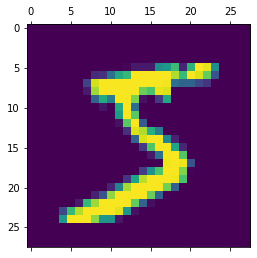

In [8]:
plt.matshow(X_train[0])

In [9]:
y_train[2]

4

# converting the matrix data into an array

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

X_train_flattened
X_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

In [14]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")     # activation functions:- stepfunction(linear), sigmoid, tanh, relu, leakyrelu
])

model.compile(
    optimizer = 'adam',
    loss = "sparse_categorical_crossentropy",
    metrics=["accuracy"]

)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4706 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3034 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2835 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2729 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2670 - accuracy: 0.9259


In [16]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2683 - accuracy: 0.9241


[0.268332302570343, 0.9240999817848206]

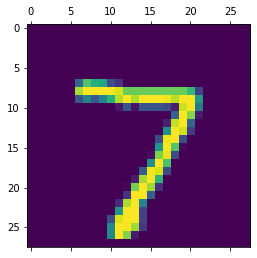

In [17]:
plt.matshow(X_test[0])

In [18]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.6121467e-02, 3.5973224e-07, 4.5392394e-02, 9.6184278e-01,
       2.7294755e-03, 8.9422107e-02, 1.2372220e-06, 9.9977565e-01,
       1.3078982e-01, 6.7218190e-01], dtype=float32)

In [19]:
np.argmax(y_predicted[0])

7

# since the predicted value is in the form of whole value, we need to convert them to the actual values

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [22]:
cm = tf.math.confusion_matrix(labels = y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    5,    2,    3,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   4,   12,  907,   18,   13,    4,   11,   11,   48,    4],
       [   2,    0,   13,  929,    1,   17,    2,    9,   24,   13],
       [   1,    1,    4,    1,  918,    0,    8,    3,    9,   37],
       [   8,    3,    3,   39,   11,  760,   15,    9,   36,    8],
       [  11,    3,    7,    1,    8,   15,  908,    2,    3,    0],
       [   1,    5,   20,    8,    9,    0,    0,  937,    3,   45],
       [   5,    8,    5,   19,   10,   21,    7,   11,  877,   11],
       [   9,    7,    1,    9,   26,    5,    0,   11,    7,  934]])>

Text(69.0, 0.5, 'Truth')

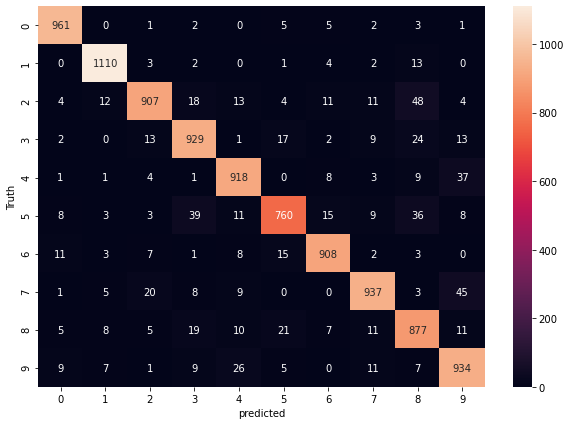

In [23]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")

# adding a hidden layer to the neuron network

In [24]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = "sparse_categorical_crossentropy",
    metrics=["accuracy"]

)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2708 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1215 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0845 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0512 - accuracy: 0.9846


In [25]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - ETA: 0s - loss: 0.0818 - accuracy: 0.97 - 1s 2ms/step - loss: 0.0848 - accuracy: 0.9730


[0.08479294180870056, 0.9729999899864197]

Text(69.0, 0.5, 'truth')

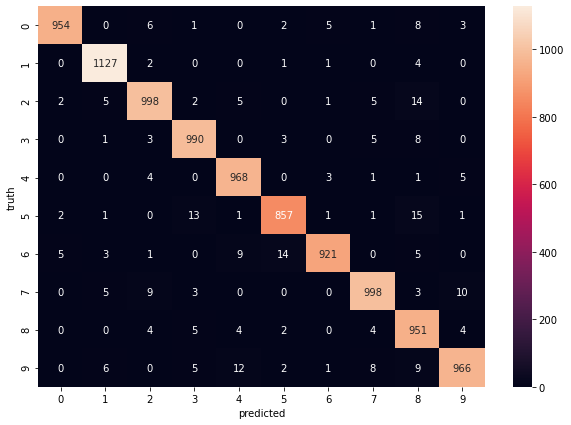

In [26]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel("truth")

# If we do not want to flatten the 2d array to 1d again and again we need to do the following thing

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="log/", histogram_freq=1)

model.compile(
    optimizer = 'adam',
    loss = "sparse_categorical_crossentropy",
    metrics=["accuracy"]

)

model.fit(X_train_flattened, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2699 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1218 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0848 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0647 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0514 - accuracy: 0.9844


# Try using different hyperparameters of model compile and find the difference in the accuracy of the model

# Run the tensorboard using the following command

In [34]:
import tensorflow
%load_ext tensorboard
%tensorboard --logdir log/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.